In [1]:
import pandas
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
dados = pandas.read_csv(r"C:\Users\Hilster\Documents\Códigos\DropsBrawl\Starr Drops.txt", delimiter = "|")

In [3]:
print(dados)

           data data_modificacao         tipo    raridade
0    27/06/2023       30/12/2023       Diário        Raro
1    27/06/2023       30/12/2023       Diário        Raro
2    27/06/2023       30/12/2023       Diário    Lendário
3    28/06/2023       30/12/2023       Diário        Raro
4    28/06/2023       30/12/2023       Diário  Super Raro
..          ...              ...          ...         ...
855  13/01/2024       14/01/2024       Diário    Lendário
856  13/01/2024       14/01/2024  Promocional  Super Raro
857  14/01/2024       14/01/2024       Diário        Raro
858  14/01/2024       14/01/2024       Diário        Raro
859  14/01/2024       14/01/2024       Diário        Raro

[860 rows x 4 columns]


In [4]:
tipos = dados["tipo"].value_counts()
quantidades = [ (tipo,quantidade) for tipo, quantidade in tipos.items()]
tipos, quantidades = zip(*quantidades)
raridades = dados["raridade"].value_counts()
raridades = [ raridade for raridade,_ in raridades.items()]
print(raridades)
print(tipos)
print(quantidades)

['Raro', 'Super Raro', 'Épico', 'Mítico', 'Lendário']
('Diário', 'Mega Pig', 'Promocional')
(673, 100, 87)


In [5]:
quantidades, tipos = list(quantidades), list(tipos)
quantidades.append(sum(quantidades))
tipos.append("Total")
print(quantidades, tipos)

[673, 100, 87, 860] ['Diário', 'Mega Pig', 'Promocional', 'Total']


In [6]:
quantidade_tipo = []
for i,tipo in enumerate(tipos):
    if tipo != "Total":
        temp = dados.loc[dados["tipo"]==tipo,"raridade"]
    else:
        temp = dados.loc[:,"raridade"]
    quantidade_tipo.append(temp)

In [7]:
labels = [i for i in tipos if i != "Total"]
q=len(labels)-1
variacao=1/q
colors = [(1-i*variacao, 0+i*variacao, 0+i*variacao) for i,_ in enumerate(labels)]
total = quantidades[-1]
print(labels,total)

['Diário', 'Mega Pig', 'Promocional'] 860


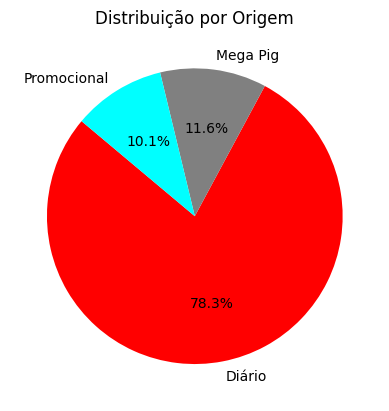

In [8]:
sizes = [i/total * 100 for i,tipo in zip(quantidades,tipos) if tipo != "Total"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por Origem')
plt.show()

In [9]:
sizes = []
for q_t in quantidade_tipo:
    size =[]
    for raridade in raridades:
        temp=0
        for i in q_t:
            if i == raridade:
                temp+=1
        size.append(temp)
    sizes.append(size)
print(sizes)

[[340, 181, 103, 34, 15], [49, 33, 12, 5, 1], [37, 22, 14, 4, 10], [426, 236, 129, 43, 26]]


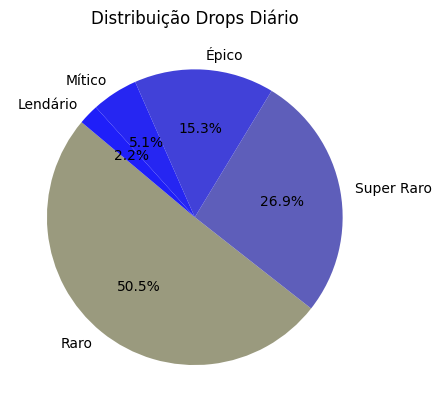

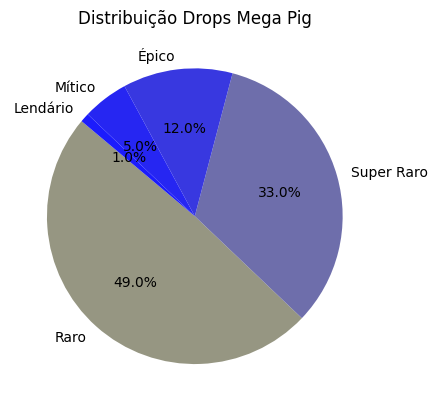

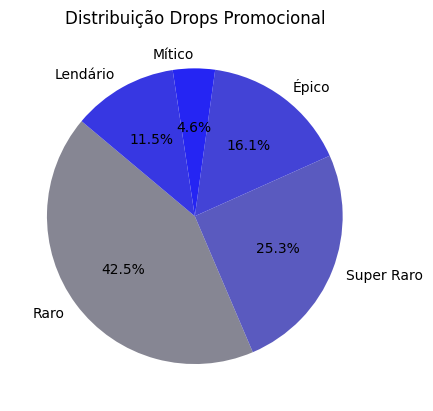

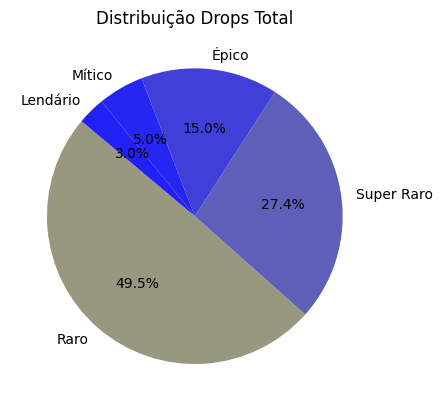

In [10]:
for i,size in enumerate(sizes):
    total = sum(size)
    variacao=1/total
    colors = [(0.1+_*variacao, 0.1+_*variacao, 1-_*variacao) for i,_ in enumerate(size)]
    size = [i/total * 100 for i in size ]
    plt.pie(size, labels=raridades, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribuição Drops {tipos[i]}')
    plt.show()

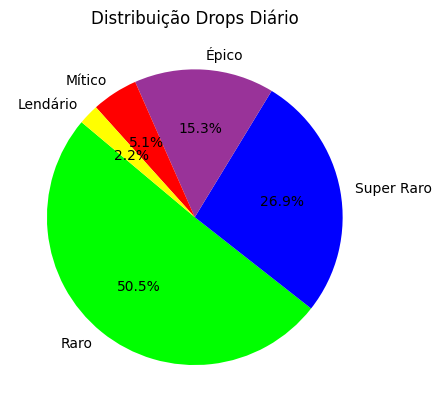

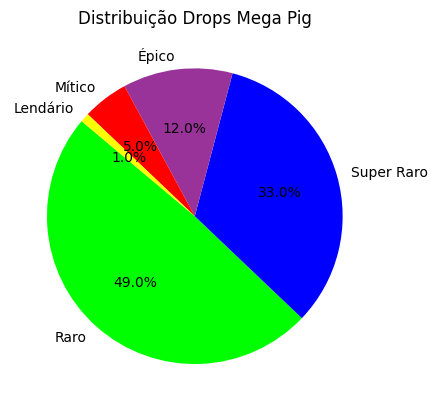

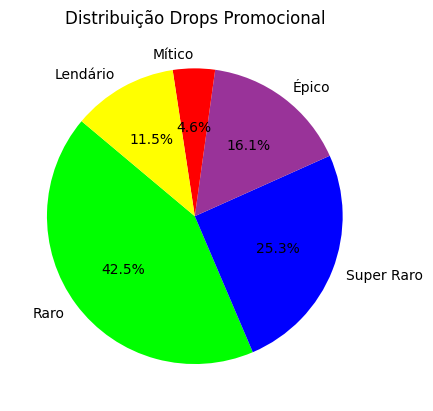

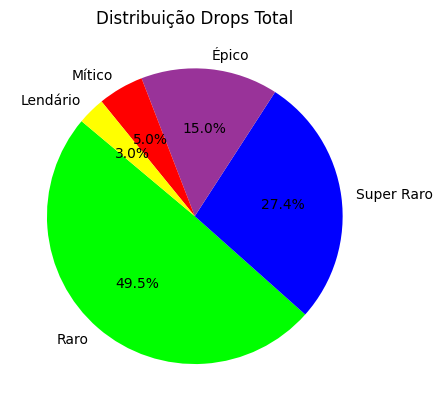

In [77]:
for i,size in enumerate(sizes):
    total = sum(size)
    variacao=1/total
    colors = [(0,1,0),(0,0,1),(0.6, 0.2, 0.6),(1, 0, 0),(1, 1, 0)]
    size = [i/total * 100 for i in size ]
    plt.pie(size, labels=raridades, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribuição Drops {tipos[i]}')
    plt.savefig(f'Distribuição Drops {tipos[i]}.png')
    plt.show()

In [13]:
dados.shape

(860, 4)

In [69]:
dias_raridades=[[] for i in raridades]
quantidade_raridades=[[] for i in raridades]
raridades_soma=[0 for i in raridades]
print(raridades_soma)


[0, 0, 0, 0, 0]


In [70]:
data=None
dia=-1
for i in range(dados.shape[0]):
    indice=raridades.index(dados.loc[i,"raridade"])
    if dados.loc[i,"data"] != data:
        data=dados.loc[i,"data"]
        dia+=1
    dias_raridades[indice].append(dia)
    raridades_soma[indice]+=1
    
    
    quantidade_raridades[indice].append(raridades_soma[indice])


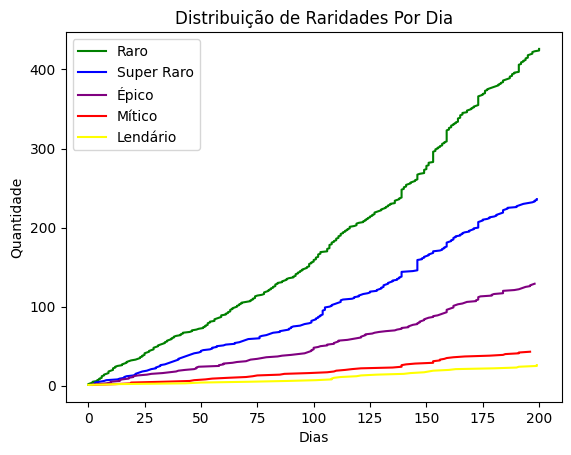

In [76]:
import matplotlib.pyplot as plt

plt.ylabel('Quantidade')
plt.xlabel('Dias')

i = 0
cores = ['green', 'blue', 'purple', 'red', 'yellow']  # Lista de cores


for quantidades, dias, cor, rotulo in zip(quantidade_raridades, dias_raridades, cores, raridades):
    # Adiciona a curva ao gráfico com uma legenda, cor e rótulo específicos
    plt.plot(dias, quantidades, label=rotulo, color=cor)
    i += 1

# Adiciona uma legenda ao gráfico
plt.legend()

# Adiciona um título geral para o gráfico
plt.title('Distribuição de Raridades Por Dia')
plt.savefig('grafico_completo.png')

# Exibe o gráfico
plt.show()


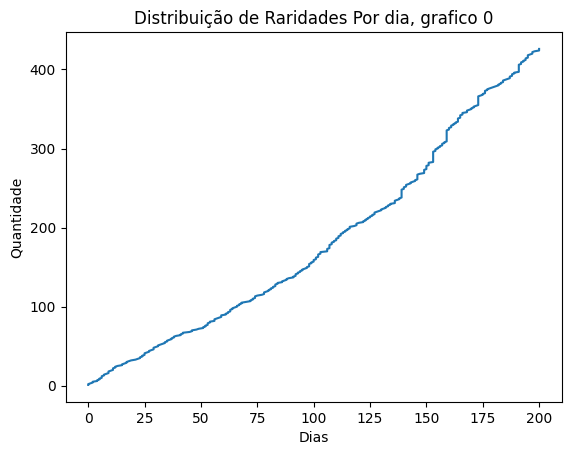

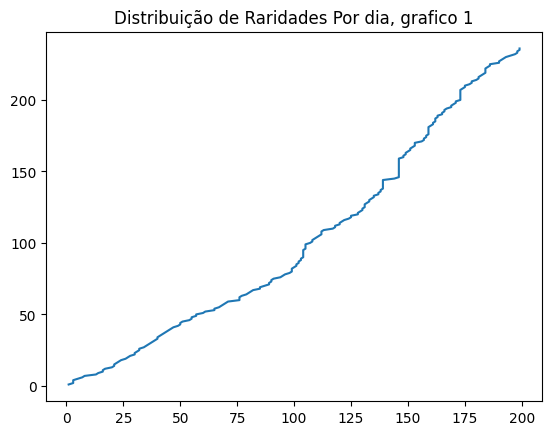

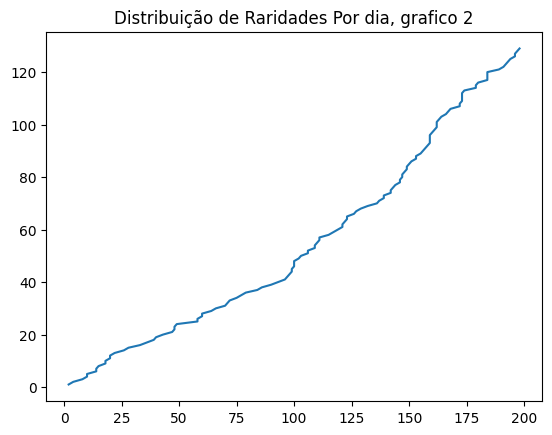

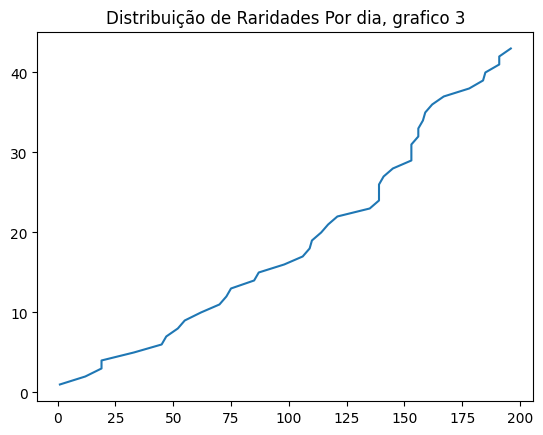

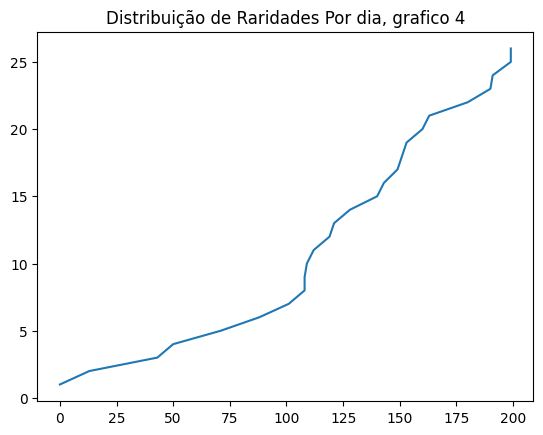

In [78]:
plt.ylabel('Quantidade')
plt.xlabel('Dias')

i=0
for quantidades,dias in zip(quantidade_raridades,dias_raridades):
    #plota as alturas de acordo com as 100 alturas cadastradas
    plt.title(f'Distribuição de Raridades Por dia, grafico {i}')
    plt.plot(dias, quantidades)
    
    #plt.savefig(f'grafico {i}.png')
    
    plt.show()
    i+=1